<a href="https://colab.research.google.com/github/GuYoonJeong/gu.github.io/blob/main/4_MachineLearning_Model_Evaluation_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 구조
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl

# 데이터 분할: train, test
from sklearn.model_selection import train_test_split

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier

# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

# xgboost
import xgboost as xgb

# 모델 성능 평가 : F1 Socre, ROC Cureve, AUC
from sklearn.metrics import f1_score, roc_curve, roc_auc_score

In [ ]:
# 한글 맑은 고딕 적용
mpl.rc("font", family = "Malgun Gothic")
# 음수값 표시
mpl.rc('axes', unicode_minus = False)

In [ ]:
df_raw = pd.read_csv("../data/bank.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [ ]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)
# JOB 변수의 결측치는 "Other"로 대체
df_raw["JOB"].fillna("Other", inplace = True)
# 숫자형 변수의 결측치는 해당 변수의 평균값으로 대체
df_raw.fillna(df_raw.mean(), inplace=True)

In [ ]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw)
# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [ ]:
# 설명변수, 목표변수 분리
df_raw_x = df_raw_dummy.drop("BAD", axis =1, inplace =False)
df_raw_y =df_raw_dummy["BAD"]

In [ ]:
# 학습용/평가용 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print("학습용 데이터의 X 크기 : {}".format(df_train_x.shape))
print("학습용 데이터의 Y 크기 : {}".format(df_train_y.shape))
print("평가용 데이터의 X 크기 : {}".format(df_test_x.shape))
print("평가용 데이터의 Y 크기 : {}".format(df_test_y.shape))

학습용 데이터의 X 크기 : (2623, 18)
학습용 데이터의 Y 크기 : (2623,)
평가용 데이터의 X 크기 : (1125, 18)
평가용 데이터의 Y 크기 : (1125,)


In [ ]:
# 모델 분석
model = ["DecisionTree", "RandomForest","GradientBoosting", "XGboost" ]
# 정확도 저장
train_accuracy =[] ; test_accuracy =[]
# fl score 저장
model_f1_score =[]
# auc 스코어 저장
model_auc=[]

## 의사결정나무모델

In [ ]:
# 모델 생성
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(dt_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

# 예측값
y_pred =dt_model.predict(df_test_x)

# roc_auc 계산
roc_auc = roc_auc_score(df_test_y, y_pred)
# auc 저장
model_auc.append(roc_auc)
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))


## 랜덤포레스트 모델

In [ ]:
# 모델 생성
rf_model = RandomForestClassifier(min_samples_leaf =1 , max_depth = 8, n_estimators = 100,
                                  random_state=1234)
rf_model.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

# 예측값
y_pred =rf_model.predict(df_test_x)

# roc_auc 계산
roc_auc = roc_auc_score(df_test_y, y_pred)
#auc 저장
model_auc.append(roc_auc)
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

## 그래디언트 부스팅 모델

In [ ]:
# 모델 생성
gb_final = GradientBoostingClassifier(min_samples_leaf=5 , max_depth = 6, n_estimators = 200,
                                  learning_rate=0.3 ,random_state=1234)
gb_final.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

# 예측값
y_pred =gb_final.predict(df_test_x)

# roc_auc 계산
roc_auc = roc_auc_score(df_test_y, y_pred)
# auc 저장
model_auc.append(roc_auc)
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

## XG 부스팅 모델

In [ ]:
# 모델 생성
xgb_final = xgb.XGBClassifier(learning_rate = 0.3, booster = 'gbtree', max_depth = 5, 
                          n_estimators = 150, gamma = 0, objective = 'binary:logistic',random_state=1234)
xgb_final.fit(df_train_x, df_train_y)

# train 정확도
train_accuracy.append(xgb_final.score(df_train_x, df_train_y))
# test 정확도
test_accuracy.append(xgb_final.score(df_test_x, df_test_y))

# 예측값
y_pred =xgb_final.predict(df_test_x)

# roc_auc 계산
roc_auc = roc_auc_score(df_test_y, y_pred)
# auc 저장
model_auc.append(roc_auc)
# f1 스코어
model_f1_score.append(f1_score(df_test_y, y_pred))

/home/ubuntu/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
model

['DecisionTree', 'RandomForest', 'GradientBoosting', 'XGboost']

In [ ]:
# 모델별 정확도 표
df_eval = pd.DataFrame(index=model)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval["AUC"] = model_auc

df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.930,0.925,0.364,0.613
RandomForest,0.949,0.936,0.471,0.654
GradientBoosting,1.000,0.948,0.609,0.721
XGboost,1.000,0.943,0.579,0.710


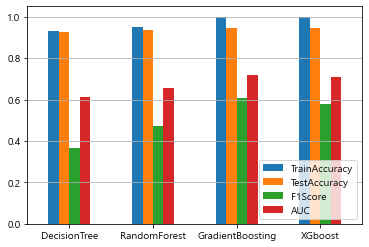

In [ ]:
# 정확도 bar plot 생성
df_eval.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.grid(axis = "y")